In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fakescorr import fakescorr, find_nearest
%matplotlib inline
from matplotlib import rc, rcParams
rcParams.update({'font.size':12})
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

def recovery(fakes, ID, save=False, figure=False):
    f = fakes.copy()
    f['ed_ratio']=f.ed_rec/f.ed_fake
    f = f.sort_values(by='ed_fake')[(f.ed_fake < 1e6) & (f.ed_ratio < 1.2)]
    
    lmax = np.log10(f.ed_fake.max())
    lmin = np.log10(f.ed_fake.min())
    bins = np.power(10,np.linspace(lmin,lmax,f.shape[0]/100))
    m = pd.DataFrame()
    f['range1'], bins = pd.cut(f.ed_fake, bins, retbins=True,include_lowest=True)
    m['mean_ed_fake'] = f.groupby('range1').ed_fake.mean()
    m['mean_rec_fake'] = f.groupby('range1').rec_fake.mean()
    m['std_rec_fake'] = f.groupby('range1').rec_fake.std()
    m = m.dropna(how='any')
    if figure == True:
        m.plot(x='mean_ed_fake', y='mean_rec_fake', yerr='std_rec_fake',loglog=True,
          label=('recovery rate'))
    threshold = m.mean_ed_fake[m.mean_rec_fake == find_nearest(m.mean_rec_fake.tolist(), 0.2)[0]].tolist()[0]
    return  threshold, m

def EDratio(fakes, ID, save=False, figure=False):
    f = fakes[fakes.rec_fake!=0.]
    f['ed_ratio']=f.ed_rec/f.ed_fake
    f = f.sort_values(by='ed_ratio')
    f = f[f.ed_ratio<1.5]
    if figure==True:
        plt.figure(figsize=(7,5))
        plt.scatter(f.ed_rec,f.ed_ratio,s=f.ed_rec_err/f.ed_rec*1e3, alpha=0.5,color='k',
                    label='$\sigma_{ED}/ED$')
        plt.axhline(y=1.,color='r')
        plt.axhline(y=1.1,color='r',linestyle='dashed')
        plt.xscale('log')
        plt.yscale('log')
        plt.ylim((0.1,1.5))
        plt.xlim((1,1e6))
        plt.xlabel('recovered ED (s)')
        plt.ylabel('recovered ratio of injected ED')
        plt.title('EPIC {}'.format(ID))
        plt.legend(loc=4, frameon=False)
    if save == True:
        plt.savefig('stars_shortlist/share/corrected/ed_ratio_{}.png'.format(ID),
                    dpi=300)
    return 



In [30]:
test = 'run_06'
Cs = ['Pleiades','M44','M67']
Cs = ['M44']
Tlims = [(3000.0,3249.0,'red'),(3250.0,3499.0,'orange'),
         (3500.0,3749.0,'green'),(3750.0,4000.0,'c'),(3000.0,7000.0,'black'),
         (4000.0,7000.0,'blue')]
threshs = pd.DataFrame(Tlims,columns=['Tmin','Tmax','color'])
for cl in Cs:
    params = pd.read_csv('stars_shortlist/{0}/results/{1}/catalog/{0}_parameter.csv'.format(cl,test))
    if cl not in threshs.columns:
        threshs[cl]=np.nan
    for Tmin,Tmax,color in Tlims:
        Tb = params[(params['T'] <= Tmax) & (params['T'] >= Tmin)]

        Ethresh = Tb.thresh20p*Tb.L_quiet
        threshs[cl][(threshs.Tmin==Tmin) & (threshs.Tmax==Tmax)] = Ethresh.median()
threshs.to_csv('stars_shortlist/share/{}_median_detection_thresholds.csv'.format(test))
threshs

AttributeError: 'DataFrame' object has no attribute 'thresh20p'

['Unnamed: 0' 'EPIC' 'angDist' 'col1' 'Name' 'RAJ2000' 'DEJ2000' 'OName'
 'Vmag' 'Ksmag' '(V-K)0' 'Prot' 'Per2' 'Per3' 'Per4' 'Amp' 'LC' 'Mm'
 'LPer' 'H10' 'vsini' 'PapIII' 'PapII' 'f_EPIC' 't' 'objID' 'RAJ2000.1'
 'DEJ2000.1' 'errHalfMaj' 'errHalfMin' 'errPosAng' 'f_objID' 'Qual'
 'Epoch' 'Ns' 'Nd' 'gmag' 'e_gmag' 'gKmag' 'e_gKmag' 'gFlags' 'rmag'
 'e_rmag' 'rKmag' 'e_rKmag' 'rFlags' 'imag' 'e_imag' 'iKmag' 'e_iKmag'
 'iFlags' 'zmag' 'e_zmag' 'zKmag' 'e_zKmag' 'zFlags' 'ymag' 'e_ymag'
 'yKmag' 'e_yKmag' 'yFlags' 'Dataset Name' 'Campaign' 'Object type'
 'Data Release' 'RA (J2000)' 'Dec (J2000)' 'Target Type' 'Archive Class'
 'Ref' 'Actual Start Time' 'Actual End Time' 'Investigation ID' 'RA PM'
 'RA PM Err' 'Dec PM' 'Dec PM Err' 'Plx' 'Plx Err' 'U Mag' 'U Mag Err'
 'B Mag' 'B Mag Err' 'V Mag' 'V Mag Err' 'G Mag' 'G Mag Err' 'R Mag'
 'R Mag Err' 'I Mag' 'I Mag Err' 'Z Mag' 'Z Mag Err' 'J' 'J Mag Err' 'H'
 'H Mag Err' 'K' 'K Mag Err' 'KEP Mag' 'Kep Flag' 'Hip ID' 'Tyc ID'
 'SDSS ID' 'UCA

/home/eilin/.local/lib/python3.4/site-packages/pandas/core/frame.py:1942: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)
/usr/lib/python3.4/site-packages/ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/usr/lib/python3.4/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python3.4/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


210770541.0 04
off
210776021.0 04
off
210791550.0 04
off
210803812.0 04
off
210804191.0 04
off
210815768.0 04
off
210817078.0 04
off
210817106.0 04
off
210822528.0 04
off
210830104.0 04
off
210832378.0 04
off
210833622.0 04
off
210854098.0 04
off
210860152.0 04
off
210862226.0 04
off
210865020.0 04
off
210866482.0 04
off
210871940.0 04
off
210872577.0 04
off
210873256.0 04
off
210876759.0 04
off
210877263.0 04
off
210878635.0 04
off
210880560.0 04
off
210881103.0 04
off
210882573.0 04
off
210886244.0 04
off
210886447.0 04
off
210887995.0 04
off
210888723.0 04
off
210901321.0 04
off
210903023.0 04
off
210909923.0 04
off
210911601.0 04
off
210912544.0 04
off
210914325.0 04
off
210915466.0 04
off
210917578.0 04
off
210919084.0 04
off
210922602.0 04
off
210923443.0 04
off
210926194.0 04
off
210927253.0 04
off
210927331.0 04
off
210933044.0 04
off
210934634.0 04
off
210939705.0 04
off
210940129.0 04
off
210940436.0 04
off
210940839.0 04
off
210941338.0 04
off
210942652.0 04
off
210944157.0 

210872505.0 04
off
210875952.0 04
off
210892321.0 04
off
210894583.0 04
off
210899735.0 04
off
210907442.0 04
off
210932705.0 04
off
210943453.0 04
off
210946466.0 04
off
210949721.0 04
off
210965731.0 04
off
210966931.0 04
off
210974893.0 04
off
210989020.0 04
off
210993561.0 04
off
210998478.0 04
off
211000740.0 04
off
211003744.0 04
off
211004088.0 04
off
211005924.0 04
off
211007344.0 04
off
211015258.0 04
off
211020371.0 04
off
211021827.0 04
off
211026906.0 04
off
211033487.0 04
off
211033935.0 04
off
211037012.0 04
off
211038138.0 04
off
211039634.0 04
off
211045153.0 04
off
211046168.0 04
off
211053549.0 04
off
211058381.0 04
off
211063744.0 04
off
211064196.0 04
off
211067634.0 04
off
211068337.0 04
off
211069863.0 04
off
211071563.0 04
off
211071722.0 04
off
211074151.0 04
off
211077349.0 04
off
211077464.0 04
off
211081122.0 04
off
211081985.0 04
off
211085091.0 04
off
211090866.0 04
off
211092630.0 04
off
211095292.0 04
off
211096421.0 04
off
211096432.0 04
off
211097941.0 

210769047.0 04
off
210770541.0 04
off
210776021.0 04
off
210779549.0 04
off
210784223.0 04
off
210784603.0 04
off
210791550.0 04
off
210803812.0 04
off
210804191.0 04
off
210815768.0 04
off
210817078.0 04
off
210817106.0 04
off
210822528.0 04
off
210829886.0 04
off
210830104.0 04
off
210832378.0 04
off
210833049.0 04
off
210833622.0 04
off
210837336.0 04
off
210839388.0 04
off
210840112.0 04
off
210846442.0 04
off
210854098.0 04
off
210855272.0 04
off
210860152.0 04
off
210862226.0 04
off
210863683.0 04
off
210865020.0 04
off
210866482.0 04
off
210866744.0 04
off
210871940.0 04
off
210872505.0 04
off
210872577.0 04
off
210873256.0 04
off
210875952.0 04
off
210876759.0 04
off
210877263.0 04
off
210878635.0 04
off
210880560.0 04
off
210881103.0 04
off
210882573.0 04
off
210886244.0 04
off
210886447.0 04
off
210887995.0 04
off
210888723.0 04
off
210892321.0 04
off
210892390.0 04
off
210894583.0 04
off
210899735.0 04
off
210899950.0 04
off
210901321.0 04
off
210903023.0 04
off
210905362.0 

211067590.0 04
off
211067634.0 04
off
211067702.0 04
off
211067927.0 04
off
211067949.0 04
off
211068337.0 04
off
211068400.0 04
off
211068579.0 04
off
211069418.0 04
off
211069510.0 04
off
211069615.0 04
off
211069863.0 04
off
211070495.0 04
off
211070577.0 04
off
211070599.0 04
off
211070664.0 04
off
211071351.0 04
off
211071431.0 04
off
211071563.0 04
off
211071722.0 04
off
211071863.0 04
off
211072160.0 04
off
211072438.0 04
off
211072441.0 04
off
211072835.0 04
off
211073154.0 04
off
211074151.0 04
off
211074500.0 04
off
211074799.0 04
off
211074858.0 04
off
211074888.0 04
off
211075014.0 04
off
211075627.0 04
off
211075777.0 04
off
211075914.0 04
off
211076042.0 04
off
211076441.0 04
off
211076650.0 04
off
211076761.0 04
off
211077349.0 04
off
211077464.0 04
off
211077607.0 04
off
211077649.0 04
off
211077682.0 04
off
211077833.0 04
off
211078145.0 04
off
211078239.0 04
off
211078274.0 04
off
211078329.0 04
off
211078393.0 04
off
211078413.0 04
off
211078565.0 04
off
211078690.0 

211067419.0 04
off
211067702.0 04
off
211068400.0 04
off
211070599.0 04
off
211070664.0 04
off
211072160.0 04
off
211072441.0 04
off
211074888.0 04
off
211076042.0 04
off
211079794.0 04
off
211081593.0 04
off
211081656.0 04
off
211082436.0 04
off
211085419.0 04
off
211086025.0 04
off
211087357.0 04
off
211089323.0 04
off
211091768.0 04
off
211091848.0 04
off
211093705.0 04
off
211095259.0 04
off
211096368.0 04
off
211097402.0 04
off
211100565.0 04
off
211103863.0 04
off
211104176.0 04
off
211104722.0 04
off
211106743.0 04
off
211107623.0 04
off
211111496.0 04
off
211113202.0 04
off
211113345.0 04
off
211114317.0 04
off
211114329.0 04
off
211115638.0 04
off
211118542.0 04
off
211120842.0 04
off
211121141.0 04
off
211121734.0 04
off
211123901.0 04
off
211128863.0 04
off
211129308.0 04
off
211129400.0 04
off
211149600.0 04
off
211177579.0 04
off
3.810757562356421e+32 4.222952377256487e+34


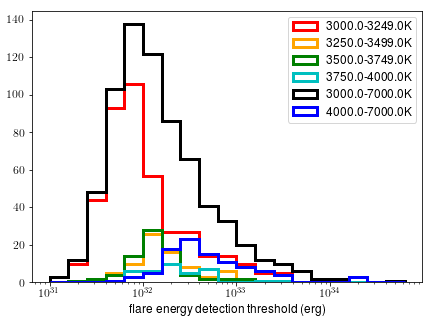

In [27]:
cluster = 'Pleiades'
test = 'run_06'
c = '04'
params = pd.read_csv('stars_shortlist/{0}/results/{1}/catalog/{0}_parameter.csv'.format(cluster,test))
plt.figure(figsize=(7,5))
for Tmin,Tmax,color in Tlims:
    Tb = params[(params['T'] <= Tmax) & (params['T'] >= Tmin)]
    try:
        print(Tb.columns.values)
        Ethresh = Tb['thresh20p']*Tb.L_quiet
    except KeyError:
        for ID in Tb.EPIC.values:
            Tb = calc_thresh(ID,Tb,c)
        Ethresh = Tb['thresh20p']*Tb.L_quiet
    if Ethresh.shape[0]!=0:
        Ethresh.hist(bins=np.power(10,np.arange(31,35,0.2)),histtype='step',
                 color=color,linewidth=3,grid=False,label='{}-{}K'.format(Tmin,Tmax))
    plt.xscale('log')
    plt.xlabel('flare energy detection threshold (erg)')
    plt.legend()
    #plt.savefig('stars_shortlist/share/{}_{}_median_detection_thresholds.png'.format(test,cluster))
    print(Ethresh.median(),Ethresh.std())

In [28]:
def calc_thresh(ID,params,c):
    try:
        #path = 'stars_shortlist/{}/results/{}/fakes/{}_k2sc_allfakes.csv'.format(cluster,test,ID)

        path = '/home/eilin/research/k2_cluster_flares/aprun/k2sc_05/{}-c{}_kepler_v2_lc.fits_all_fakes.csv'.format(int(ID),c)
        
        df = pd.read_csv(path)
        threshold, m = recovery(df,ID)
        if 'thresh20p' not in params.columns:
            params['thresh20p'] = np.nan
        params['thresh20p'][params.EPIC==ID] = threshold
        
    except (FileNotFoundError, OSError):
        print('OF')
        pass
    return params